<h2>Baseline gradient boosted decision tree model trained using LightGBM </h2>

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import lightgbm as lgb
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tabulate import tabulate


In [2]:
ember2018 = '../Dataset/ember_zip/ember2018'

<h4> Train and Test Datset loaded </h4>

In [3]:

train_dataset = np.load(os.path.join(ember2018,'ember2018_train_data.npz'),allow_pickle=True)
X_train, y_train= train_dataset['arr_0'],train_dataset['arr_1']
test_dataset = np.load(os.path.join(ember2018,'ember2018_test_data.npz'),allow_pickle=True)
X_test,y_test = test_dataset['arr_0'],test_dataset['arr_1']

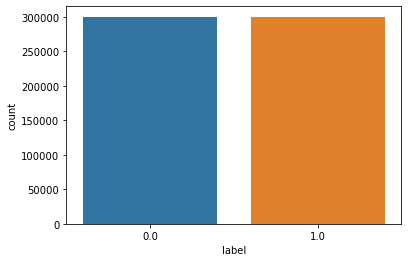

In [4]:
df = pd.DataFrame(data=y_train, columns=["label"])
sns.countplot(x = 'label', data=df);


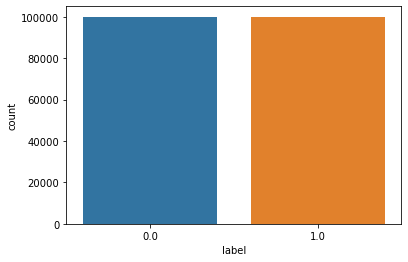

In [5]:
df = pd.DataFrame(data=y_test, columns=["label"])
sns.countplot(x = 'label', data=df);


<h4> A simple LightGBM model is trained and tested with default params </h4

In [ ]:
params = {
    "boosting": "gbdt",
}
lgbm_dataset = lgb.Dataset(X_train, y_train)
lgbm_model = lgb.train(params, lgbm_dataset)
lgbm_model.save_model(os.path.join(ember2018, "model2018.txt"))

In [6]:
lgbm_model = lgb.Booster(model_file=os.path.join(ember2018,"model2018.txt"))

In [7]:
y_test_pred = lgbm_model.predict(X_test)
y_train_pred1 = lgbm_model.predict(X_train)
print (y_test_pred[:10])

[ 1.00337967  0.17395378  1.0968505   0.11058255  0.00546004  1.01191492
  0.06304254 -0.07678607  0.95925355  0.29313985]


<h5> It can be observed that with simple model with default params 100 trees and number of leaves 31 </h5>
<h5>  train accuarcy was 100% , test accuracy obtained was 93% it took very less time to train</h5>
<h5> The corresponding Confusion matrix and classification reports shown below </h5>

In [8]:
y_test_pred1 = np.where(y_test_pred > 0.5, 1, 0)
y_train_pred = np.where(y_train_pred1 > 0.5, 1, 0)
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred1))
# sns.heatmap(confusion_matrix_df, annot=True);
confusion_matrix_df

,0,1
0,91323,8677
1,5436,94564


In [9]:
print(classification_report(y_test, y_test_pred1))


              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93    100000
         1.0       0.92      0.95      0.93    100000

    accuracy                           0.93    200000
   macro avg       0.93      0.93      0.93    200000
weighted avg       0.93      0.93      0.93    200000



In [10]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_train, y_train_pred))

# sns.heatmap(confusion_matrix_df, annot=True);
confusion_matrix_df

,0,1
0,284127,15873
1,15338,284662


In [11]:
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95    300000
         1.0       0.95      0.95      0.95    300000

    accuracy                           0.95    600000
   macro avg       0.95      0.95      0.95    600000
weighted avg       0.95      0.95      0.95    600000



<h4> ember_model_2018.txt is a pretrained model provided by ember </h4>
<h5> It was trained using the parameters params = {
            "boosting": "gbdt",
            "objective": "binary",
            "num_iterations": 1000,
            "learning_rate": 0.05,
            "num_leaves": 2048,
            "max_depth": 15,
            "min_data_in_leaf": 50,
            "feature_fraction": 0.5
        } </h5>


<h5> we can observe the model sizes below, model with deafult params having size 380kB where as model
    with higher params having size 121MB </h5>

In [ ]:
ls -l ../Dataset/ember_zip/ember2018/*.txt

<h5> After parameter tuning and by increasing the capacity of the dtree test accuracy was improved to 98% </h5>
<h5> The corresponding Confusion matrix and classification reports shown below </h5>

In [17]:
lgbm_model = lgb.Booster(model_file=os.path.join(ember2018,"ember_model_2018.txt"))

In [19]:
y_test_pred = lgbm_model.predict(X_test)
y_train_pred1 = lgbm_model.predict(X_train)
y_test_pred1 = np.where(y_test_pred > 0.5, 1, 0)
y_train_pred = np.where(y_train_pred1 > 0.5, 1, 0)

confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred1))

# sns.heatmap(confusion_matrix_df, annot=True);
confusion_matrix_df

,0,1
0,98314,1686
1,2710,97290


In [20]:
print(classification_report(y_test, y_test_pred1))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98    100000
         1.0       0.98      0.97      0.98    100000

    accuracy                           0.98    200000
   macro avg       0.98      0.98      0.98    200000
weighted avg       0.98      0.98      0.98    200000



In [21]:

confusion_matrix_df = pd.DataFrame(confusion_matrix(y_train, y_train_pred))

# sns.heatmap(confusion_matrix_df, annot=True);
confusion_matrix_df

,0,1
0,300000,0
1,1,299999


In [22]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    300000
         1.0       1.00      1.00      1.00    300000

    accuracy                           1.00    600000
   macro avg       1.00      1.00      1.00    600000
weighted avg       1.00      1.00      1.00    600000



<h3> Experiment With Packer: </h3>
<h5> Generally Packers are used to compress the PEfiles. But the same are being used for encoding the PE files to 
Obfuscate Malware detectors. To check the perormance of the model aginst packers I have taken 26 clean files from windows and created varients of them using UPX packer. when tested against the model, it is observed that all the original files classified as benign. but one packed file detected as malware which is packed verison standard cmd.exe in windows</h5>

In [ ]:
original_binaries_dir =   '../Dataset/executables/original'
packed_binaries_dir =   '../Dataset/executables/packed'

In [ ]:
!ls '../Dataset/executables/packed'

In [ ]:
!ls '../Dataset/executables/original'

In [ ]:
from extract_binary_features import extract_features
from ember_dataset import create_data,read_metadata,read_vectorized_features


In [ ]:
original_features = extract_features(original_binaries_dir,feature_version=2)
packed_features = extract_features(packed_binaries_dir,feature_version=2)

In [ ]:
original_features.shape, packed_features.shape

In [ ]:
y_orig_pred = lgbm_model.predict(original_features)
y_orig_pred = np.where(y_orig_pred > 0.5, 1, 0)
print (y_orig_pred)


In [ ]:
y_packed_pred = lgbm_model.predict(packed_features)
y_packed_pred = np.where(y_packed_pred > 0.5, 1, 0)
print (y_packed_pred)

<h3> Experiment With Sorel Datset on model trained using ember Dataset </h3>
<h5> test-features.npz and validation-features.npz are the files obtained from sorel datset which combinely contains
20 lakh malware features and 45 lakh beningn samples.</h5>

<h5>When tested 98% accuracy was obtained aginst these datasets. It is good to see that the model which was trained using 3 lakh samples was able to detect 20 lakh malwares well with 98% accuarcy. which means the model is generaizing well with all classes of the malwares. Results and confusion matrix can be seen below</h5>

In [26]:
sorel_dir = '../Dataset/sorel'

In [ ]:

data = np.load(os.path.join(sorel_dir,'test-features.npz'))

data['arr_0'].shape

In [ ]:
train = data['arr_0']
y_true= data['arr_1']
y_pred = lgbm_model.predict(train)
y_pred = np.where(y_pred > 0.5, 1, 0)
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_true, y_pred))
# sns.heatmap(confusion_matrix_df, annot=True);
confusion_matrix_df

In [ ]:
print(classification_report(y_true, y_pred))

In [ ]:

data = np.load(os.path.join(sorel_dir,'validation-features.npz'))
data['arr_0'].shape

In [ ]:
train = data['arr_0']
y_true= data['arr_1']
y_pred = lgbm_model.predict(train)
y_pred = np.where(y_pred > 0.5, 1, 0)
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_true, y_pred))
# sns.heatmap(confusion_matrix_df, annot=True);
confusion_matrix_df

In [ ]:
print(classification_report(y_true, y_pred))

<h3> Experiment with differrrent classes of malwares on model trained using ember Dataset </h3>
<h5> Tested the model with 11 classes of the malwares, it is observed that for the classes crypto_miner and downloader
the detection ration is very less compared to others around 60% the distribution of the malware sample from each class and the corressponding accuracies shown below.</h5>



In [27]:
data = np.load(os.path.join(sorel_dir,'sorel_data.npz'),allow_pickle=True)
data['arr_0'].shape,data['arr_1'].shape,

((104746, 2381), (104746, 13))

In [28]:
y_pred = lgbm_model.predict(data['arr_0'])
y_pred = np.where(y_pred > 0.5, 1, 0)
print("accuracy is: ", np.sum(y_pred)/len(y_pred))


accuracy is:  0.9209420884807057


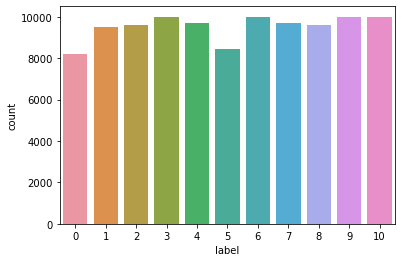

In [29]:
df = pd.DataFrame(data=data['arr_1'][:,-1], columns=["label"])
sns.countplot(x = 'label', data=df)

In [30]:
def per_label_detection(labels,y_pred):
    D = [[0,0] for range in np.unique(labels)]
    for l,y in zip(labels,y_pred):
        D[l][0] += 1
        D[l][1] += y
    return D
P = per_label_detection(data['arr_1'][:,-1],y_pred)


labels = ['adware', 'flooder', 'ransomware', 'dropper',
   'spyware', 'packed', 'crypto_miner', 'file_infector', 'installer',
   'worm', 'downloader']

table = []
for i,l in zip(P,labels):
    
    table.append([l,i[0],i[1], i[1]/i[0]])
print (tabulate(table,headers=['label', 'sample_count','samples_detected','accuracy']))


label            sample_count    samples_detected    accuracy
-------------  --------------  ------------------  ----------
adware                   8211                7151    0.870905
flooder                  9481                9480    0.999895
ransomware               9607                9585    0.99771
dropper                  9997                9942    0.994498
spyware                  9717                9557    0.983534
packed                   8465                7776    0.918606
crypto_miner             9988                8655    0.86654
file_infector            9709                9067    0.933876
installer                9595                5533    0.576655
worm                    10000                9969    0.9969
downloader               9976                9750    0.977346


0.9812892095


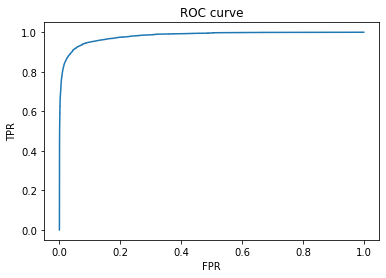

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt



print (roc_auc_score(y_test, y_test_pred))

fpr, tpr, _ = roc_curve(y_test, y_test_pred)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

0.9894951144


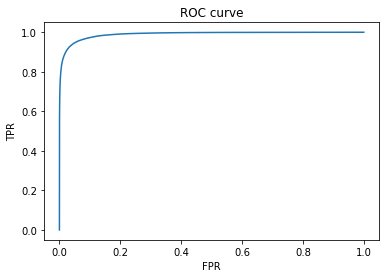

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt



print (roc_auc_score(y_train, y_train_pred1))

fpr, tpr, _ = roc_curve(y_train, y_train_pred1)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

0.9964289467999999


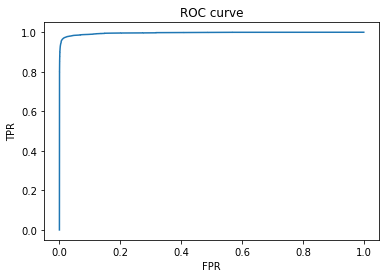

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt



print (roc_auc_score(y_test, y_test_pred))

fpr, tpr, _ = roc_curve(y_test, y_test_pred)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

0.9999999999944444


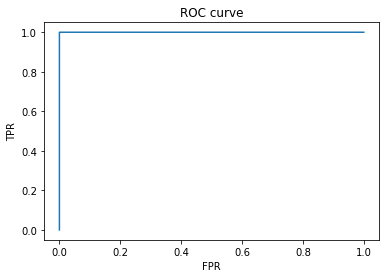

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt



print (roc_auc_score(y_train, y_train_pred1))

fpr, tpr, _ = roc_curve(y_train, y_train_pred1)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()